<a href="https://colab.research.google.com/github/2403A51L03/DataMining/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Coefficients: [ 214.85431338   26.89412867  169.7307647  -507.84418623]
Linear Regression Intercept: -429926.2564246025
Linear Regression - Mean Squared Error: 38428.6060353447, R-squared Score: 0.7704392861103683
SVM Regression - Mean Squared Error: 180168.7218074615, R-squared Score: -0.07627272143732688


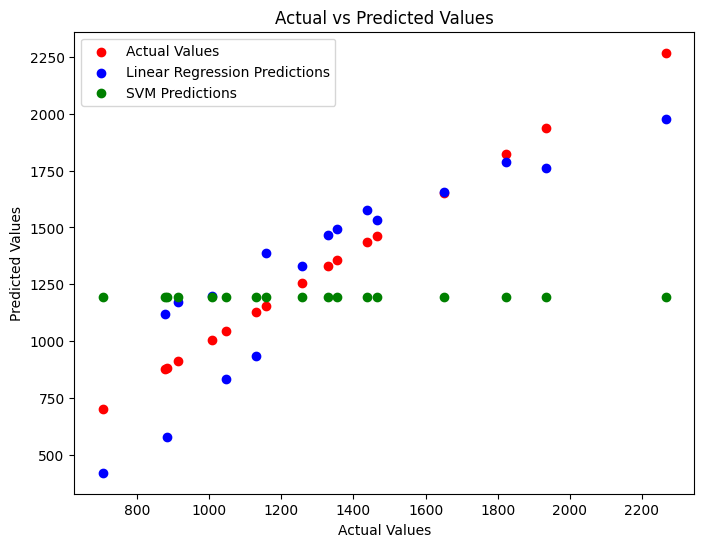

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('/content/economic_index_expanded.csv')

df = pd.DataFrame(data)


X = df[['year', 'month', 'interest_rate', 'unemployment_rate']]
y = df['index_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)


svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


print(f"Linear Regression Coefficients: {linear_model.coef_}")
print(f"Linear Regression Intercept: {linear_model.intercept_}")


mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Linear Regression - Mean Squared Error: {mse_linear}, R-squared Score: {r2_linear}")
print(f"SVM Regression - Mean Squared Error: {mse_svm}, R-squared Score: {r2_svm}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='red', label='Actual Values')
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression Predictions')
plt.scatter(y_test, y_pred_svm, color='green', label='SVM Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
